# MENINAS NA ENGENHARIA

### *Beatriz Alexandre e Manuela Castilla*

## Objetivo do trabalho

Para o nosso trabalho, decidimos pesquisar e estudar sobre meninas na engenharia, nos questionando o porque há tão poucas.. Para isso, não havia um dataset já pronto. Assim, fizemos formulários para meninas na engenharia, tanto no INSPER quanto para outras faculdades, como também meninas que fazem os demais cursos no INSPER (administração e economia).

Assim, obtemos suficiente respostas para podermos criar e analisar um dataset, conseguindo então criar um classificador, que, a partir das respostas ao formulário, nos diria se a menina tende a fazer engenharia ou não.

Para isso, organizamos os dados e analisamos estes.

## Pegando os dados: meninas na engenharia

In [1]:
# primeiro importamos tudo que seria necessário para o nosso projeto

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI
from scipy.stats import norm, probplot, t
import statsmodels.api as sm
from pandas.core import datetools
from sklearn.linear_model import SGDClassifier

/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Primeiramente, lemos os excels e organizamos estes:

Lendo a primeira página do excel cuja é da engenharia do INSPER:

In [21]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

In [23]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se SIM na pergunta anterior,  quais familiares?'] = eng_insper['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [24]:
eng_insper['Fez Insper?']='Sim'


In [25]:
eng_insper_idx=eng_insper.set_index('NOME')

lendo o segundo datasheet de todas as faculdades:

In [26]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)

In [27]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM"})


eng_geral['Se SIM na pergunta anterior,  quais familiares?'] = eng_geral['Se SIM na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [28]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [59]:
eng_geral['Fez Insper?']='Não'

In [31]:
eng_geral_idx=eng_geral.set_index('NOME')

Ao baixar os datasheets, juntamos estes:

In [32]:
len(pd.concat([eng_insper_idx, eng_geral_idx]))

120

In [34]:
eng = pd.concat([eng_insper_idx, eng_geral_idx])
eng.head(2)

,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se SIM na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
NOME,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Osasco SP,Escola Privada,Coc Sapiens,Não,Ninguém,Sim,Gosta de Exatas,Sim,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 15000 - R$ 20000,Entre 62 a 65 anos,Não,Sim
manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,São Paulo SP,Escola Privada,Escola da vila,Sim,Pai e tio,Não,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim


Para poder fazer nossa análise, fora precisa, simplificar as respostas, para consgeuir fazer a análise sem algum erro

In [35]:
sp = len(eng[eng['ESTADO/CID'].str.contains('SP|Sp', case=False)])
sc = len(eng[eng['ESTADO/CID'].str.contains('SC', case=False)])
mg =len(eng[eng['ESTADO/CID'].str.contains('MG', case=False)])
to = len(eng[eng['ESTADO/CID'].str.contains('TO', case=False)])
ba = len(eng[eng['ESTADO/CID'].str.contains('BA', case=False)])
rj = len(eng[eng['ESTADO/CID'].str.contains('RJ', case=False)])
pr = len(eng[eng['ESTADO/CID'].str.contains('PR', case=False)])
ms = len(eng[eng['ESTADO/CID'].str.contains('MS', case=False)])
es = len(eng[eng['ESTADO/CID'].str.contains('ES', case=False)])
go = len(eng[eng['ESTADO/CID'].str.contains('GO', case=False)])

In [36]:
torta_es = []
torta_es.append(sp)
torta_es.append(sc)
torta_es.append(mg)
torta_es.append(to)
torta_es.append(ba)
torta_es.append(rj)
torta_es.append(pr)
torta_es.append(ms)
torta_es.append(es)
torta_es.append(go)

nomes_es =[]
nomes_es.append("SP")
nomes_es.append("SC")
nomes_es.append("MG")
nomes_es.append("TO")
nomes_es.append("BA")
nomes_es.append("RJ")
nomes_es.append("PR")
nomes_es.append("MS")
nomes_es.append("ES")
nomes_es.append("GO")

tortas_es = pd.DataFrame()
tortas_es["quem"]= nomes_es
tortas_es["estado"] = torta_es

tortas_es.idx = tortas_es.set_index("quem")
tortas_es.idx

print(tortas_es)

  quem  estado
0   SP     104
1   SC       3
2   MG       6
3   TO       5
4   BA       9
5   RJ       2
6   PR       2
7   MS       1
8   ES       3
9   GO       2


/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [47]:
mae = 0
maeL =[]

avos = 0
avosL =[]

pai = 0
paiL =[]

tio = 0
tioL=[]

irmaos =0
irmaosL =[]

ninguem = 0
ninguemL =[]

padrasto = 0
padrastoL=[]

primos = 0
primosL=[]

for k in eng['Se SIM na pergunta anterior,  quais familiares?']:
    split_v = k.split(",")
    for i in split_v:
        split_e = i.split(" e")
    
    for k in split_e:
        if k == "pai" or k =="Pai" or k == "Meu pai" or k =="pai e mãe ":
            pai+=1
            paiL.append("pai")
        elif k == " mãe " or k == "Mãe" or k == "pai e mãe ":
            mae+=1
            maeL.append("mae")
        elif k =="irmã " or k ==" meu irmão" or k ==" irmão" :
            irmaos+=1
            irmaosL.append("irmao")
        elif k ==" tio." or k ==" tios" or k =="Tios" or k ==" tio":
            tio+=1
            tioL.append("tio")
        elif "padrasto" in k.lower():
            padrasto+=1
            padrastoL.append("padrasto")
        elif "ninguém" in k.lower():
            ninguem+=1
            ninguemL.append("ninguem")
        elif "avô" in k.lower() or k==" avô":
            avos+=1
            avosL.append("avos")
        elif k ==" primos" or k =='Primo' or k==' primas' or k==" primo" or k==' primos ' or k=="Dois primos":
            primos +=1
            primosL.append("primos")
    


## Pegando os dados: meninas do insper

#### lendo o excel das meninas de engenharia do INSPER

In [50]:
# leitura do excel 
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

In [51]:
#renomeando colunas:
eng_insper_2 = eng_insper_2.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM",  'Algum familiar trabalha na área de engenharia?':'Familiar na área?',  'Se SIM na pergunta anterior,  quais familiares?':'Quais familiares?', 'Engenharia foi sua 1a escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Engenharia?':'Por que escolheu este curso ?'})

#limpeza e modificações
semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre

eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Faz Engenharia?']= '1'

eng_insper_2['Quais familiares?'] = eng_insper_2['Quais familiares?'].fillna('Ninguém')


In [52]:
eng_insper_2_idx=eng_insper_2.set_index('NOME')

#### Lendo o excel das meninas do INSPER

In [53]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

In [54]:
insper = insper.drop('Qual é a distância da sua casa para a faculdade', 1)

In [55]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?', 'Se SIM na pergunta anterior, quais familiares?':'Quais Familiares?', 'Adm e/ou Econo foi sua primeira escolha?':'Seu curso foi sua 1a escolha?','Por que escolheu Administração/ Economia?': 'Por que escolheu este curso?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre

In [56]:
insper_idx=insper.set_index('NOME')

In [57]:
insper_idx['Faz Engenharia?']='0'

#### Juntando os dataframes

# ANÁLISES

## Analisamos primeiro as mulheres que fazem engenharia

#### Primeiro vimos a distribuição da escolaridade de cada menina:

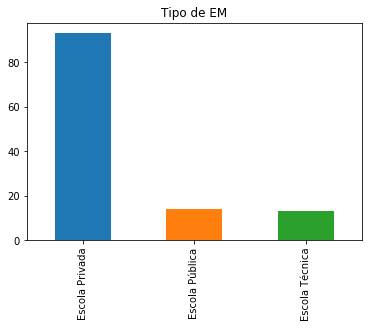

In [43]:
eng.TIPO_EM.value_counts().plot.bar()
plt.title("Tipo de EM");

#### Se existia algum familiar que estuda/estudou engenharia

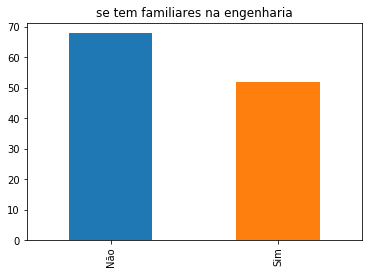

In [44]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia");

#### Se houvesse um familiar, quem que seria:

Text(0.5,1,'Familiares na Engenharia')

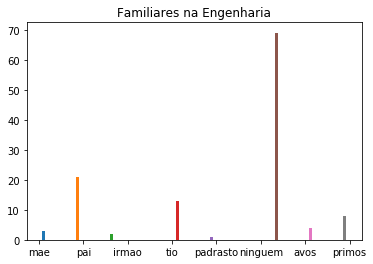

In [48]:
familia =[]
familia.append(maeL)
familia.append(paiL)
familia.append(irmaosL)
familia.append(tioL)
familia.append(padrastoL)
familia.append(ninguemL)
familia.append(avosL)
familia.append(primosL)
plt.hist(familia);
plt.title('Familiares na Engenharia')

#### Analisamos também a variação de que engenharia cada uma fazia

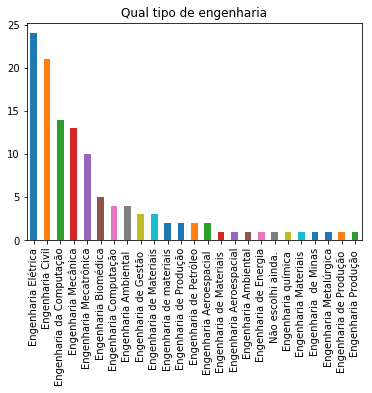

In [46]:
eng["TIPO_ENG"].value_counts().plot.bar()
plt.title("Qual tipo de engenharia");

#### Analisamos  de onde cada menina que faz engenharia veio

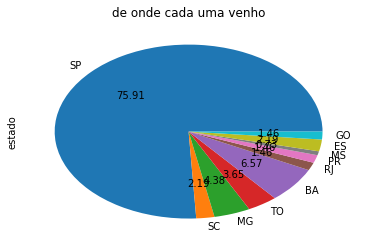

In [38]:
estados = tortas_es.idx["estado"]
estados.plot(kind="pie", autopct="%.2f", legend=False)
plt.title("de onde cada uma venho");

A partir deste gráfico de torta vemos que a maioria das meninas são originalmente de São Paulo, com em segundo lugar Bahia.

## Ao analisar somente as meninas da engenharia, analisamos as meninas do INSPER (na qual inclui Engenharia, Administração e Economia)

# O QUE FALTA

* FAZER NOSSA HIPOTESE